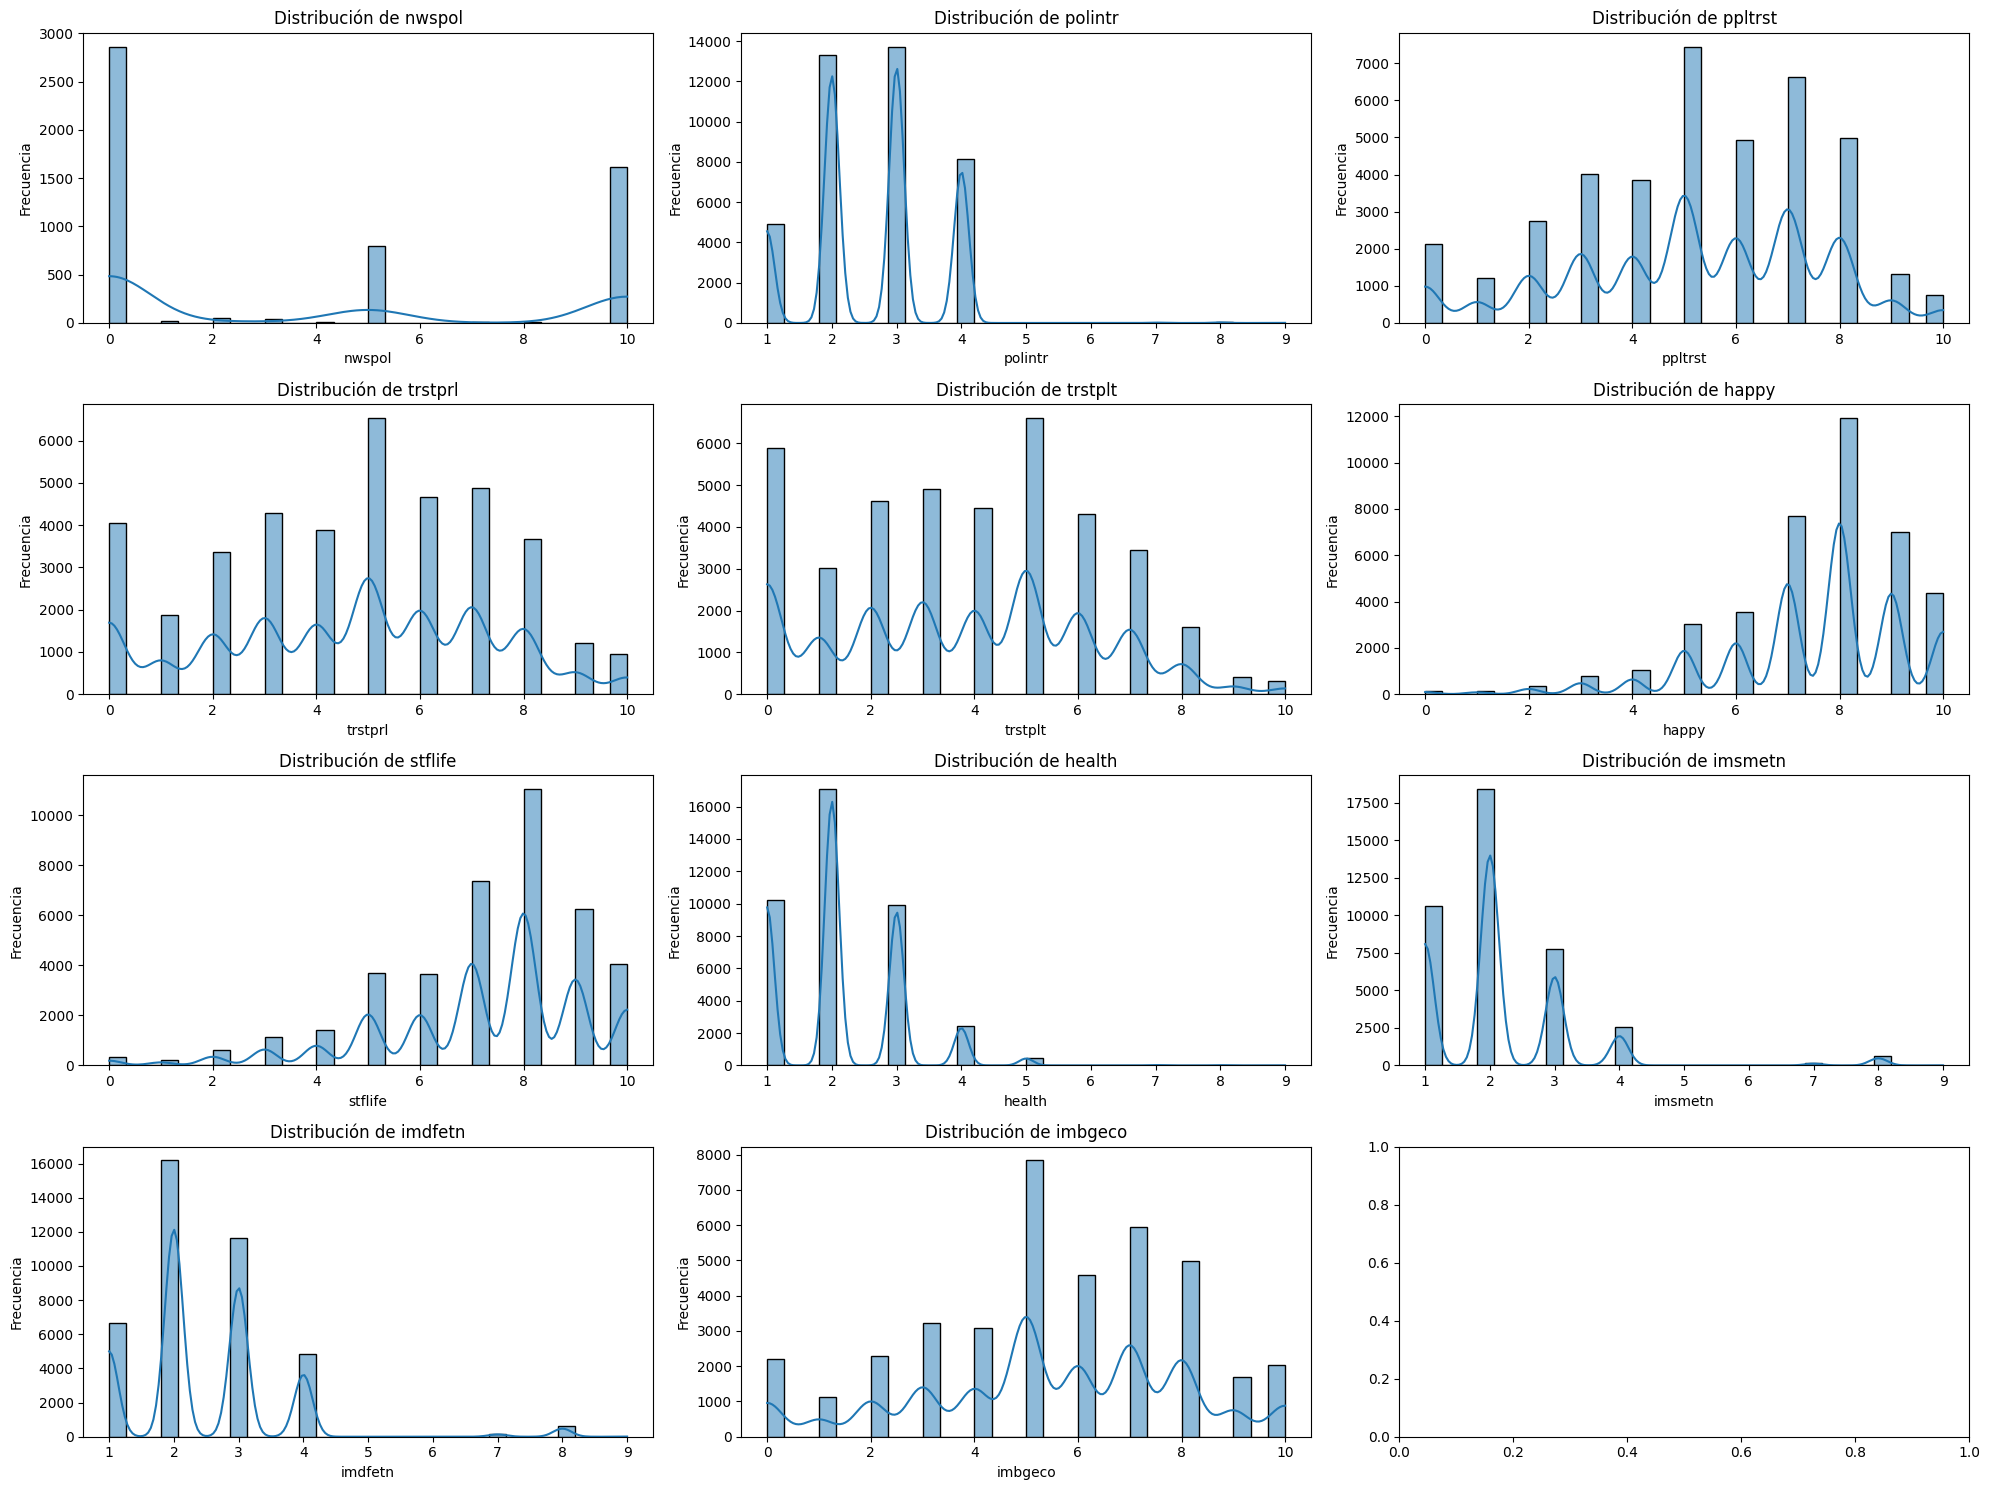

(            nwspol      polintr      ppltrst      trstprl      trstplt  \
 count  1958.000000  1958.000000  1958.000000  1958.000000  1958.000000   
 mean   2484.731869     3.078652     8.837589    37.084780    28.397344   
 std    3881.840305     1.111074    18.038062    40.573847    38.337973   
 min       0.000000     1.000000     0.000000     0.000000     0.000000   
 25%      30.000000     2.000000     3.000000     4.000000     2.000000   
 50%     120.000000     3.000000     5.000000     7.000000     5.000000   
 75%    1200.000000     4.000000     7.000000    88.000000    88.000000   
 max    9999.000000     9.000000    99.000000    99.000000    99.000000   
 
              happy      stflife       health      imsmetn      imdfetn  \
 count  1958.000000  1958.000000  1958.000000  1958.000000  1958.000000   
 mean      8.864658     9.491828     2.332993     2.470378     2.761491   
 std      11.418797    13.993417     1.317096     1.666616     1.667817   
 min       0.000000    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = '/workspace/machine-learning-python-template/data/interim/ESS11.csv'
data = pd.read_csv(file_path, low_memory=False)

# Filtrar columnas relevantes
filtered_columns = ['nwspol', 'polintr', 'ppltrst', 'trstprl', 'trstplt', 
                    'happy', 'stflife', 'health', 'imsmetn', 'imdfetn', 'imbgeco']
filtered_data = data[filtered_columns].copy()

# Identificar valores inusuales 
suspect_values = filtered_data[
    (filtered_data['nwspol'] > 1000) |
    (filtered_data['imbgeco'] == 99) |
    (filtered_data['happy'] == 99) |
    (filtered_data['stflife'] == 99) |
    (filtered_data['health'] > 5) |
    (filtered_data['polintr'] > 10) | 
    (filtered_data['ppltrst'] > 10) |
    (filtered_data['trstprl'] > 10) |
    (filtered_data['trstplt'] > 10) |
    (filtered_data['imsmetn'] > 10) |
    (filtered_data['imdfetn'] > 10)
]

# Mostrar los valores
suspect_values_summary = suspect_values.describe()

# Limpieza de valores extremos
columns_to_clean = filtered_columns
for col in columns_to_clean:
    filtered_data[col] = filtered_data[col].apply(
        lambda x: None if x == 99 or x > 1000 or x > 10 else x
    )

# Revisión de estadísticas descriptivas tras la limpieza
cleaned_summary = filtered_data[columns_to_clean].describe()

# Visualización de distribuciones
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, col in enumerate(columns_to_clean):
    sns.histplot(filtered_data[col], bins=30, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')

# Ajustar diseño 
plt.tight_layout()
plt.show()

# Mostrar resumen de valores inusuales y datos limpios
suspect_values_summary, cleaned_summary
